Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df= pd.read_csv("C:/Users/shrut/Downloads/insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#getting the shape
df.shape

(1338, 7)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#getting some information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical features are :

    1. sex
    2.smoker
    3.region

In [10]:
#statistical measures of dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\shrut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


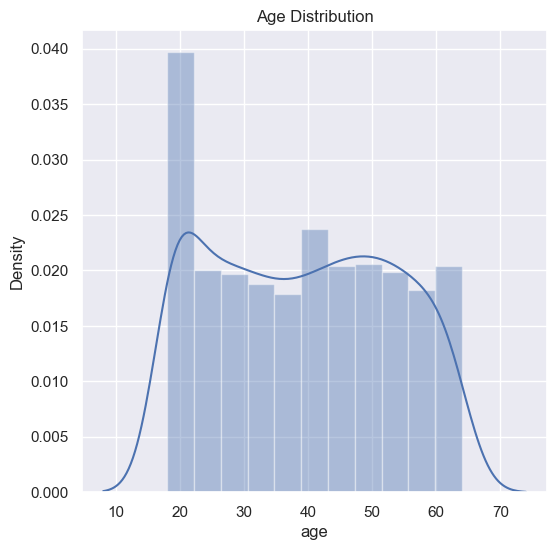

In [11]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title("Age Distribution")
plt.show()

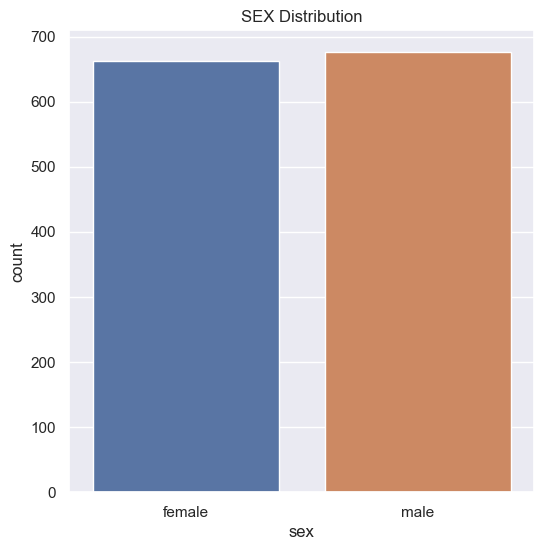

In [12]:
#distribution of gender 
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='sex' , data=df)
plt.title("SEX Distribution")
plt.show()

In [13]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\shrut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


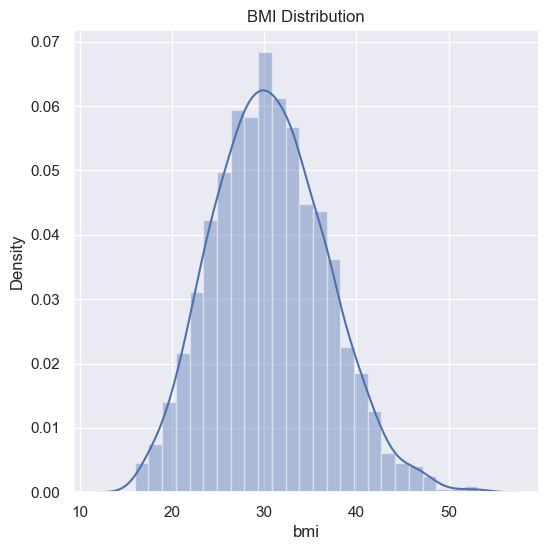

In [14]:
#distribution of bmi value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title("BMI Distribution")
plt.show()

Normal Bmi range--->18.5 to 24.9

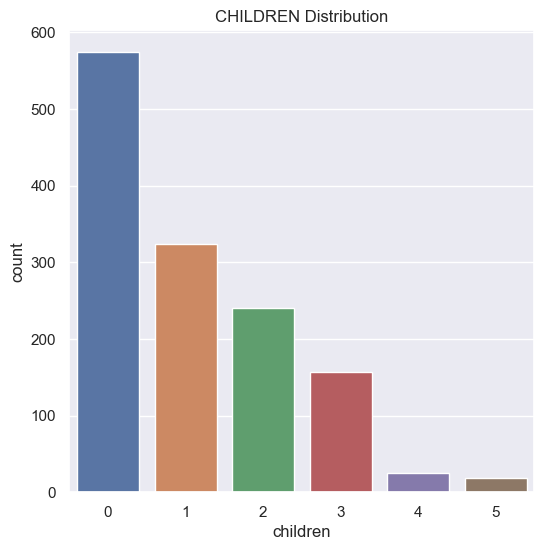

In [15]:
#distribution of children 
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='children' , data=df)
plt.title("CHILDREN Distribution")
plt.show()

In [16]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

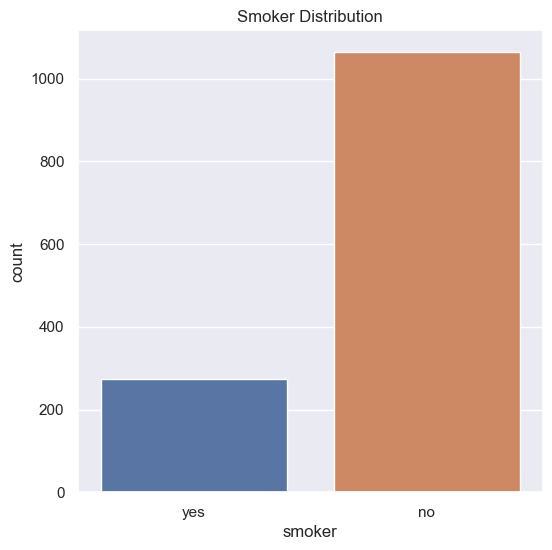

In [17]:
#distribution of cmoker 
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='smoker' , data=df)
plt.title("Smoker Distribution")
plt.show()

In [18]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

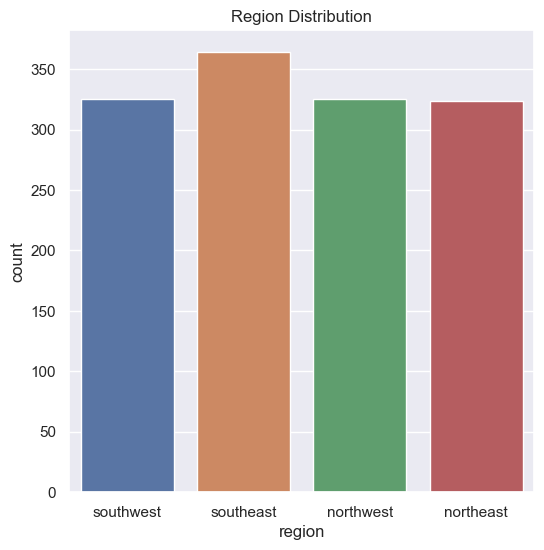

In [19]:
#distribution of region
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='region' , data=df)
plt.title("Region Distribution")
plt.show()

In [20]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\shrut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


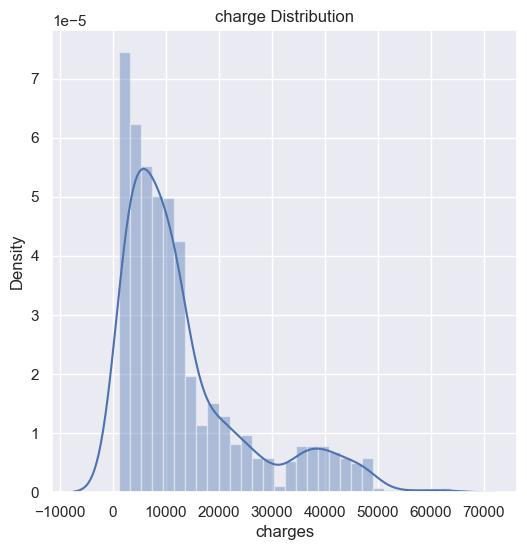

In [21]:
#distribution of chaarges value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title("charge Distribution")
plt.show()

Data Preprocessing

ENCODING THE CATEGORICAL FEATURES

In [23]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)

In [24]:
df.replace({'smoker':{"yes":0 ,"no":1}},inplace=True)

In [25]:
df.replace({'region':{'southeast':0,"southwest":1,'northeast':2,'northwest':3}},inplace=True)

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Spliting the features and Target

In [27]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

In [28]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [29]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Split data into training & testing data 

In [31]:
x_train ,x_test,y_train ,y_test=train_test_split(x,y,test=0.2, random_state=2)

In [32]:
x_train.shape ,x_test.shape,y_train.shape ,y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

Model making

Linear Regression

In [34]:
algo=LinearRegression()

In [35]:
algo.fit(x_train , y_train)

LinearRegression()

In [36]:
y_test_predict=algo.predict(x_test)

In [37]:
y_train_predict=algo.predict(x_train)

Text(0.5, 1.0, 'train prediction')

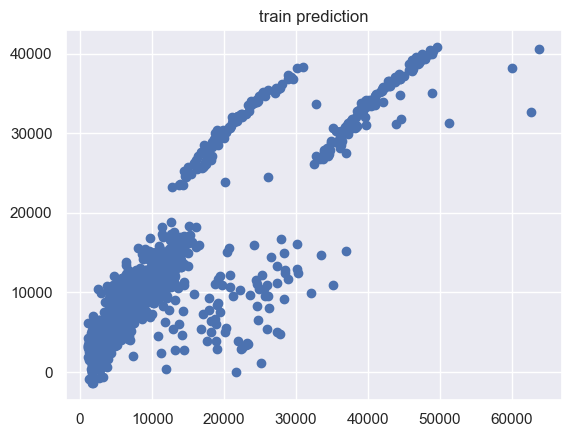

In [42]:
plt.scatter(y_train , y_train_predict)
plt.title("train prediction")

Text(0.5, 1.0, 'test prediction')

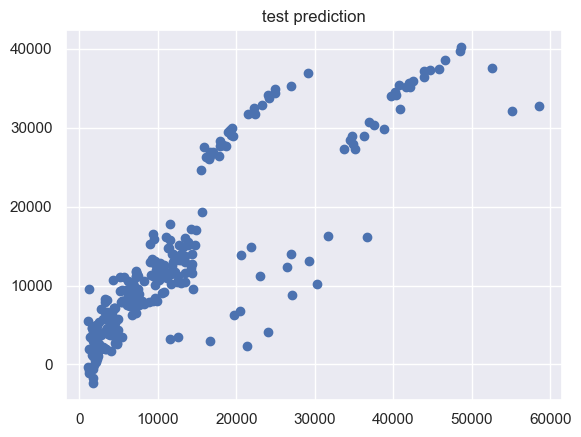

In [41]:
plt.scatter(y_test , y_test_predict)
plt.title("test prediction")

In [46]:
train_score=algo.score(x_train , y_train)
print("accuracy on training data : " , train_score) 

accuracy on training data :  0.751505643411174


In [47]:
test_score=algo.score(x_test , y_test)
print("accuracy on testing data : " , test_score)

accuracy on testing data :  0.7447273869684077


Building a Predictive System

In [52]:
input_data=(34,1,31.92,1,0,2,)
input_data_np= np.asarray(input_data)
input_data_reshape= input_data_np.reshape(1,-1)
prediction = algo.predict(input_data_reshape)
print(prediction)
print("The insurance cost is USD" , prediction[0])

[31490.51146681]
The insurance cost is USD 31490.511466805143


C:\Users\shrut\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
